<a href="https://colab.research.google.com/github/LosanChar/OCR-de-billetes/blob/main/REPORTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistema OCR, tecnología incluyente**

---



Carlos López Santa maria

losanc04@gmail.com

# **Introduccion**

En nuestra sociedad actual, existe una cantidad considerable de personas con debilidad visual o invidentes. Lamentablemente, a pesar del enorme numero de casos con esta diferencia de capacidades aun siguen siendo una minora. Teniendo como consecuencia que hayan pocos espacios y herramientas que faciliten su interración con el resto de la sociedad. 
A tal grado que incluso en el aspecto laboral sea difícil desempeñar alguna labor. Por ello, en este escrito se propone el desarrollo de un sistema OCR (Optical Character Recognition) para poder beneficiar a este grupo minoritario. 
Un Sistema de Reconocimiento Óptico de Caracteres, es un proceso dirigido a la digitalización de textos, los cuales identifican automáticamente a partir de una imagen símbolos o caracteres que pertenecen a un determinado alfabeto, para luego almacenarlos en forma de datos. Así podremos interactuar con estos mediante un programa de edición de texto o similar.
En los últimos años la digitalización de la información (textos, imágenes, sonido, etcétera) ha devenido un punto de interés para la sociedad. En el caso concreto de los textos, existen y se generan continuamente grandes cantidades de información escrita, tipográfica o manuscrita en todo tipo de soportes. En este contexto, poder automatizar la introducción de caracteres evitando la entrada por teclado implica un importante ahorro de recursos humanos y un aumento de la productividad, al mismo tiempo que se mantiene, o hasta se mejora, la calidad de muchos servicios.

# **Metodologia**


La metodologia de desarrollo de este prototipo es conciso pues se cdivide en tres etapas; a diferencia de un proyecto más elaborado, no ocuparemos más fases pues como se menciono este es un prototipo al cual podremos ir haciendo mayores implementaciones. 

*   Fase de planificación

En este punto de inicio del prototipo, se analiza las bases del prototipo, observando necesidades de las personas con débilidad visual, en este caso en particular observamos que la principila necesidad a cubrir es la lectura de textos ya sea digitales o físicos.
*   Fase de desarrollo

La fase desarrollo se lleva a cabo en cuatro pasos, los cuales se llevaran a cabo en el uso del dispisitivo de video, después hacemos la captura de la imagen en una zona especifica, para posteriormente llevar a cabo un procesamiento de la imagen haciendo una umbralización adaptativa. Una vez cumplida dicha modificación en la imágen, hacemos uso de una biblioteca llamada Tesseract para poder hacer el reconocimiento de caracteres en la imagén ya modificada. Por ultimo, para realizar pruebas de su correcto funcionamiento, comprobaremos su funcionamiento con fotográfias de billetes para observar que nuestro sistema hace el reconocimiento de su denominación, el cual nos dará como resultado un texto escrito.
*   Fase de añadiduras

En este proceso se contempla que ya una vez llevadas a cabo correctamente las pruebas y que su funcionamiento cumpla lo deseado, que es el reconocimiento de la denominación de un billete, procederemos a llevar la implementación de mejoras para dicho sistema OCR. Una de estas implementaciones que se considera es el uso de speechsynthesis.speak, una API que nos brinda la opción de leer de forma automatizada el texto extraido de los caracteres de las pruebas con billetes.


# **Requerimientos**

Para poder llevar la elaboración de este sistema OCR, no se requiere grandes herramientas tecnológicas, con el desarrollo actual contamos con la capacidad tecnológica tan a la mano para poder realizarlo. 
Hablo de que basta unicamente que contemos con un equipo de computo con conexión a internet, en donde hacemos uso de la herramienta que nos brinda Google, Colab. Además hacemos uso de lenguaje en Javascript para poder tomar captura de la imágen de nuestro interes a traves de un navegador web. Apoyamos este lenguaje con el predeterminado que nos brinda Colab, que es Python, lenguaje en el cual hacemos uso de herramientas para el procesamiento de la imágen como OpenCV, esta biblioteca nos brinda los metodos necesarios de una forma fácil para procesar imágenes, cargarlas y guardarlas. Además se requiere del motor llamado Tesseract OCR, que nos brinda de los metodos adecuados para el reconocimiento de caracteres sobre la imágen capturada y poder extraer la información contenida en esta.

# **Diseño**

En el diseño de nuestro sistema se encuentra básicamente en líneas de código. Las cuales dividiremos en cuatro bloques de funcionamiento.

El primer bloque es el que encontramos abajo, el cual unicamente su funcionamiento se encarga de solicitar permisos al dispositivo para ocupar la cámara web y poder tomar una captura de esta a traves de un click en un boton.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Este bloque lo unico de lo que se encarga es de tomar la imágen capturada en el bloque anterior y mostrarnosla en pantalla.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Para nuestro segundo bloque, nos encargaremos del procesamiento de la imágen la cual es cargada en esacala de grises con el apoyo de OpenCV para python y procedemos a llevar a cabo el procesamiento de unbralización adaptativa, para poder simplificar la imágen y poder capturar los caracteres correctamente.
Al final se busca mostrar la imágen ya umbralizada y guardarla en formato jpg.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('photo.jpg',cv2.IMREAD_GRAYSCALE)
gray=cv2.medianBlur(img,5)
dst2=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
cv2_imshow(dst2)
cv2.imwrite('umbra.jpg',dst2)


En este ultimo bloque de codigo es donde se lleva a cabo la implementación del motor de reconocimiento tesseract, el cual a traves de un llamado a la biblioteca PIL cargamos la imagen a traves de la dirección de esta misma. Y se lleva a cabo el reconocmiento de caracteres y extracción de información.

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
  from PIL import Image
except ImportError:
  import Image

In [ ]:

image_path_in_colab=('/content/umbra.jpg')
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

# **Implementación**


# **Evaluacion**


La evalución de este sistema se dio a traves del reconocimiento de la denominación de billetes. Para ello, la captura del billete en fotografia nos debe brindar de forma clara la imagen. Aquí se añade una captura.


<IPython.core.display.Javascript object>

Saved to photo.jpg


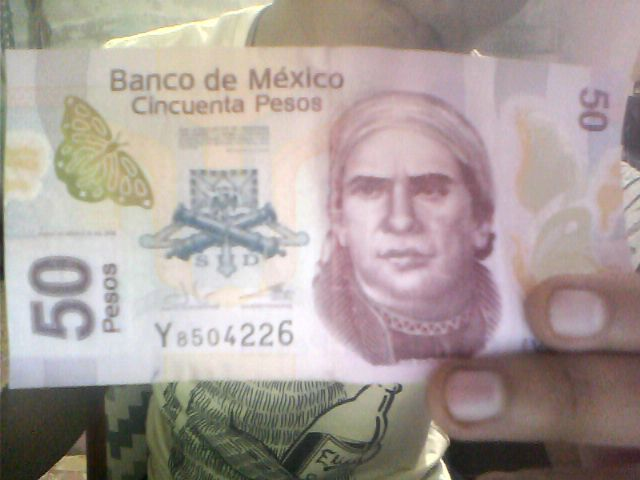

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Como se puede observar los niveles de iluminación varian por lo que una umbralización fija nos daría errores o perderiamos cierta información. Para ello, ocupamos la umbralización adaptativa, que nos beneficia por la variación ya mencionada. Una vez aplicada dicho procesamiento, nos muestra un resultado como este.


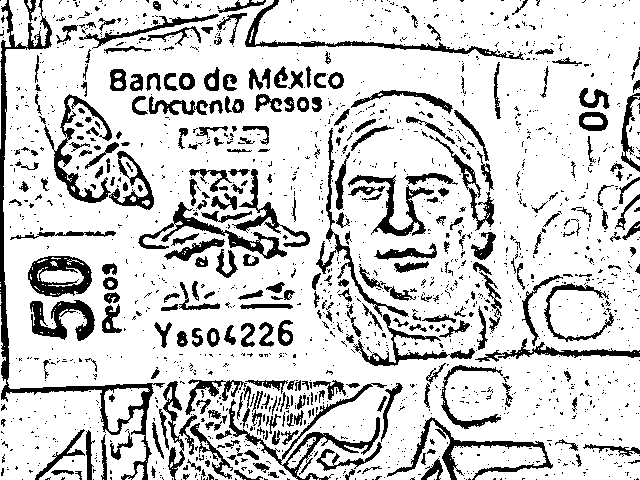

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('photo.jpg',cv2.IMREAD_GRAYSCALE)
gray=cv2.medianBlur(img,5)
dst2=cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2)
cv2_imshow(dst2)
cv2.imwrite('umbra.jpg',dst2)


Dicho procesamiento beneficia y facilita la tarea para el motor de reconocimiento Tesseract, el cual ya no cuenta con una variedad enorme de intensidades de color y luz con las cuales lidiar, pues ahora unicamente lo hace con dos tonos, blaco y negro. Mostrandonos como resultado los caracteres reconocidos por medio de la imágen procesada.


In [ ]:

image_path_in_colab=('/content/umbra.jpg')
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

Bs 4
” Banco de México _

Cincuento Pesos: A


# **Conclusiones**

Este prototipo nos enseña la facilidad con la que las herramientas tecnologicas actuales se pueden convertir en accesibles para personas con capacidades diferentes, brindando a distintos grupos sociales facilidades para poder integrarse a grupos mayoritarios. 
El poder implementar un OCR por propia cuenta de un usuario esta tan al alcance de la mano de cualquier persona que disponga de un equipo de computo y una conexión a internet. Pues el impacto que podria tener dicho prototipo puede ser benefico a tal grado de poder leer a poder que no poseen la capacidad visual.

# **Bibliografia**

Reconocimiento óptico de caracteres

https://es.wikipedia.org/wiki/Reconocimiento_%C3%B3ptico_de_caracteres

webcam

https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi

umbralizacion

http://acodigo.blogspot.com/2017/08/umbralizacion-adaptativa-con-opencv.html

guardar imagen

https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/

uso de tesseract

https://medium.com/@bhadreshpsavani/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0
